In [36]:
# Import the dependencies.
import pandas as pd
# Import the datetime module from the datetime library.
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b1fbfefa54b42c4bc203708830675e5


In [4]:
new_url=url+"&q="+"poum"


In [5]:
print(new_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b1fbfefa54b42c4bc203708830675e5&q=poum


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nadym
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | santa fe
Processing Record 4 of Set 1 | healesville
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | guangyuan
Processing Record 7 of Set 1 | mitsamiouli
Processing Record 8 of Set 1 | kaihua
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | bako
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | karamea
City not found. Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do 

Processing Record 36 of Set 4 | sorvag
City not found. Skipping...
Processing Record 37 of Set 4 | thunder bay
Processing Record 38 of Set 4 | labytnangi
Processing Record 39 of Set 4 | olutanga
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | zlobin
Processing Record 42 of Set 4 | sept-iles
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | yunyang
Processing Record 46 of Set 4 | tarudant
City not found. Skipping...
Processing Record 47 of Set 4 | devils lake
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | bolgar
Processing Record 50 of Set 4 | jibuti
City not found. Skipping...
Processing Record 1 of Set 5 | pajan
City not found. Skipping...
Processing Record 2 of Set 5 | vagamo
Processing Record 3 of Set 5 | palana
Processing Record 4 of Set 5 | kangaatsiaq
Processing Record 5 of Set 5 | magdagachi
Processing Record 6 of Set 5 | college
Proc

Processing Record 19 of Set 8 | ontario
Processing Record 20 of Set 8 | baie-comeau
Processing Record 21 of Set 8 | aragarcas
Processing Record 22 of Set 8 | aklavik
Processing Record 23 of Set 8 | olinda
Processing Record 24 of Set 8 | zabol
Processing Record 25 of Set 8 | awbari
Processing Record 26 of Set 8 | chardara
City not found. Skipping...
Processing Record 27 of Set 8 | kyren
Processing Record 28 of Set 8 | belmonte
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | los llanos de aridane
Processing Record 31 of Set 8 | luderitz
Processing Record 32 of Set 8 | winnemucca
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | araxa
Processing Record 35 of Set 8 | remedios
Processing Record 36 of Set 8 | khuzhir
Processing Record 37 of Set 8 | mareeba
Processing Record 38 of Set 8 | saint anthony
Processing Record 39 of Set 8 | parras
City not found. Skipping...
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | krutin

Processing Record 3 of Set 12 | lewistown
Processing Record 4 of Set 12 | kieta
Processing Record 5 of Set 12 | pisco
Processing Record 6 of Set 12 | borovskoy
Processing Record 7 of Set 12 | turayf
Processing Record 8 of Set 12 | chik
Processing Record 9 of Set 12 | tartagal
Processing Record 10 of Set 12 | bubaque
Processing Record 11 of Set 12 | ondjiva
Processing Record 12 of Set 12 | guozhen
Processing Record 13 of Set 12 | audincourt
Processing Record 14 of Set 12 | sovetskaya gavan
Processing Record 15 of Set 12 | chivay
Processing Record 16 of Set 12 | cumpas
Processing Record 17 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Record 18 of Set 12 | bud
Processing Record 19 of Set 12 | azare
Processing Record 20 of Set 12 | romitan
Processing Record 21 of Set 12 | genhe
Processing Record 22 of Set 12 | bluefields
Processing Record 23 of Set 12 | luba
Processing Record 24 of Set 12 | port hardy
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nadym,65.53,72.51,-4.15,98,83,6.85,RU,2019-11-09 18:31:41
1,Kapaa,22.08,-159.32,71.60,93,75,11.41,US,2019-11-09 18:22:40
2,Santa Fe,-31.62,-60.70,86.00,56,68,5.01,AR,2019-11-09 18:23:34
3,Healesville,-37.65,145.52,54.00,81,90,12.75,AU,2019-11-09 18:31:41
4,Yellowknife,62.45,-114.38,-9.01,69,20,11.41,CA,2019-11-09 18:22:39
5,Guangyuan,32.43,105.86,47.21,77,68,4.70,CN,2019-11-09 18:31:42
6,Mitsamiouli,-11.38,43.28,82.40,69,20,12.75,KM,2019-11-09 18:22:14
7,Kaihua,29.14,118.41,48.94,73,83,0.74,CN,2019-11-09 18:31:42
8,Mar Del Plata,-46.43,-67.52,52.52,44,0,13.80,AR,2019-11-09 18:22:52
9,Carnarvon,-30.97,22.13,75.94,17,100,16.62,ZA,2019-11-09 18:22:10


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1573324841.633634

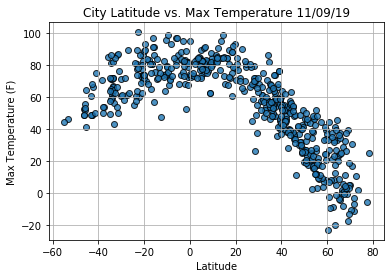

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

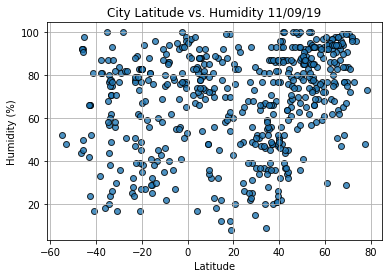

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

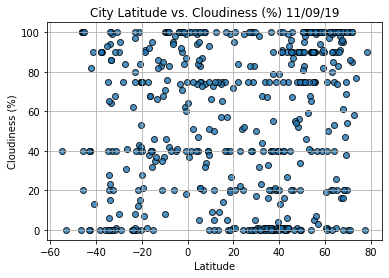

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

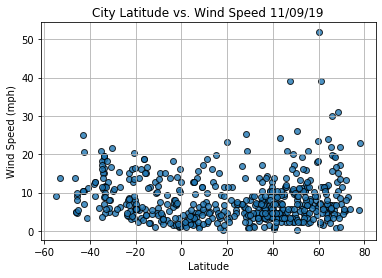

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nadym,65.53,72.51,-4.15,98,83,6.85,RU,2019-11-09 18:31:41
1,Kapaa,22.08,-159.32,71.60,93,75,11.41,US,2019-11-09 18:22:40
4,Yellowknife,62.45,-114.38,-9.01,69,20,11.41,CA,2019-11-09 18:22:39
5,Guangyuan,32.43,105.86,47.21,77,68,4.70,CN,2019-11-09 18:31:42
7,Kaihua,29.14,118.41,48.94,73,83,0.74,CN,2019-11-09 18:31:42
...,...,...,...,...,...,...,...,...,...
517,Paamiut,61.99,-49.67,34.86,83,100,5.70,GL,2019-11-09 18:33:01
519,West Wendover,40.74,-114.07,42.80,56,1,6.93,US,2019-11-09 18:33:02
520,Yatou,3.63,9.81,84.20,83,40,3.91,CM,2019-11-09 18:23:46
522,Ola,59.58,151.30,20.48,61,100,18.28,RU,2019-11-09 18:23:40


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

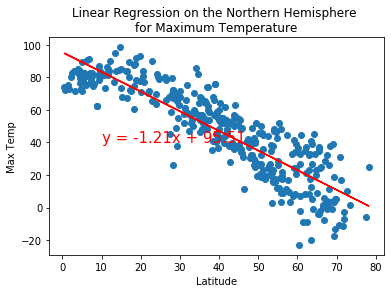

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(10,40))

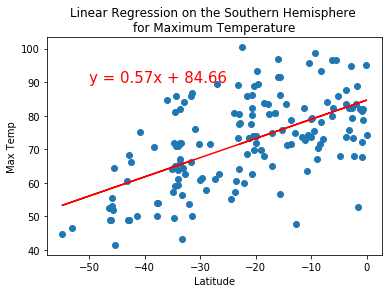

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,90))

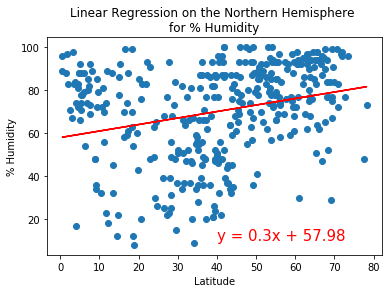

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(40,10))

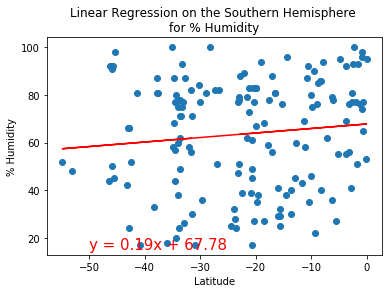

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-50,15))

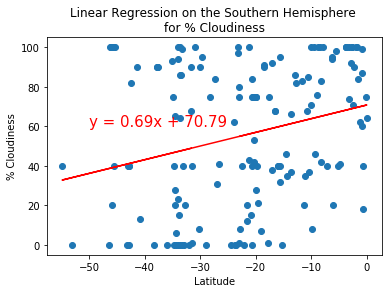

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

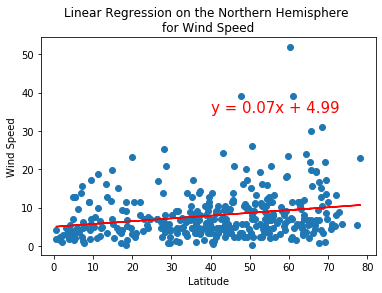

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(40,35))

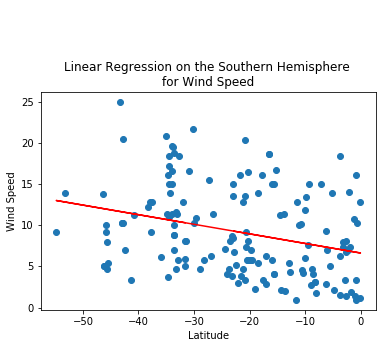

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(-50,35))